# Creating a False-Color Image #


Let's first import some of the modules that we will need.

In [1]:
import numpy as np
import glob
from astropy.io import fits
from matplotlib import pyplot as plt

% matplotlib inline

from astropy.visualization import lupton_rgb

In [2]:
 from astropy.visualization import make_lupton_rgb

## What kind of image do you have? ##

* Test Image
    * In the CCD lab, you took an image of an object through a pinhole.  You should have images in three different filters.  
    * Hopefully the position of the object did not shift between exposures.
* Telescope image
    * If you took images with our telescope as part of your independent project, it is likely that the position of your object(s) shifted between exposures.
    * To account for this shift, we will use the awesome astronometry.net to determine exactly what part of the sky you imaged.
    * One we have the World Coordinate System (wcs) information for each image, we can use it to align your individual exposures.
    * I will show how to align images in a separate tutorial.

## Example Test Images ##

To illustrate how to make an RGB image with images that are already aligned, I took images through a pinhole with the CCD aimed out my office window.

You can download a sample data set from

https://github.com/rfinn/astro-tutorials/tree/master/images

Let's first look at the a few images.

In [3]:
#set this to the directory that contains the images
datadir = 'images/'


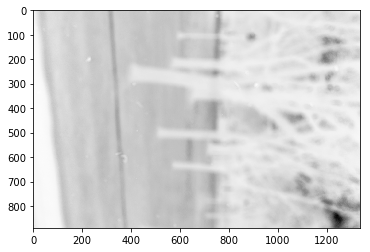

In [4]:
rimage = fits.getdata(datadir+'treesR.fits')
rimage = np.array(rimage,'f')
rimage = np.nan_to_num(rimage)
rimage = rimage - np.median(rimage)
rimage = rimage/np.mean(rimage)
plt.imshow(rimage,cmap='Greys_r')

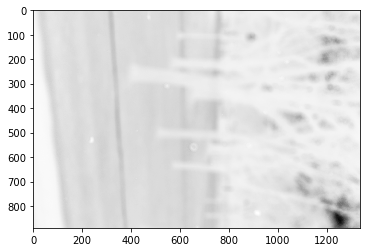

In [5]:
gimage = fits.getdata(datadir+'treesG.fits')
gimage = np.array(gimage,'f')
gimage = np.nan_to_num(gimage)
gimage = gimage- np.median(gimage)
gimage = gimage/np.mean(gimage)
plt.imshow(gimage,cmap='Greys_r')

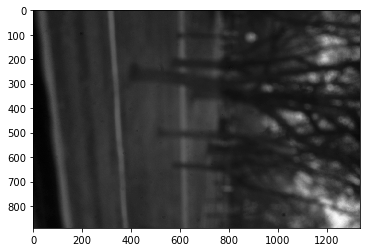

In [6]:
bimage = fits.getdata(datadir+'treesB.fits')
bimage = np.array(bimage,'f')
bimage = np.nan_to_num(bimage)
bimage = bimage- np.median(bimage)
bimage = bimage/np.mean(bimage)
plt.imshow(bimage,cmap='Greys_r')

## Now let's make a color image! ##

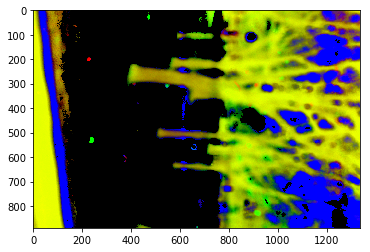

In [8]:
image = lupton_rgb.make_lupton_rgb(rimage,gimage,bimage,filename="trees.jpeg")
plt.imshow(image)


Admittedly, this is not the most colorful image, but such is the reality of upstate NY in early December...

### Astronomical Photos ###

In [470]:
from skimage import color
import skimage
import os
from scipy.stats import scoreatpercentile
import scipy.stats

In [18]:
os.chdir('/Users/rfinn/Dropbox/Siena/observatory/images/reduced/for-sandy/')

In [495]:
def readimage(imagename,subtractcol=True):
    t = fits.getdata(imagename)
    if subtractcol:
        t = t - np.median(t, axis=1, keepdims=True)
    #else:
    #    t = t - scipy.stats.mode(t, axis=1)
    t = t/np.mean(t)
    a = scoreatpercentile(t,1)
    b = scoreatpercentile(t,99.5)
    return t,a,b

In [245]:
b,ab,bb = readimage('m81-b.fits')
v,av,bv = readimage('m81-v.fits')
r,ar,br = readimage('m81-r.fits')

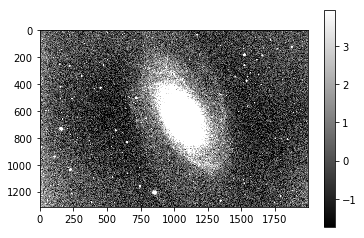

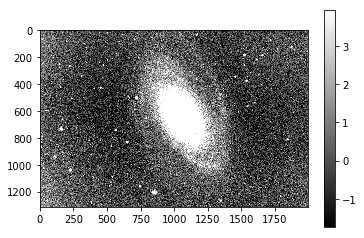

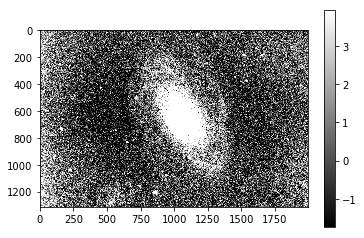

In [129]:
plt.figure()
plt.imshow(r,cmap='gray',vmin=ar,vmax=br)
plt.colorbar()
plt.figure()
plt.imshow(v,cmap='gray',vmin=ar,vmax=br)
plt.colorbar()
plt.figure()
plt.imshow(b,cmap='gray',vmin=ar,vmax=br)
plt.colorbar()

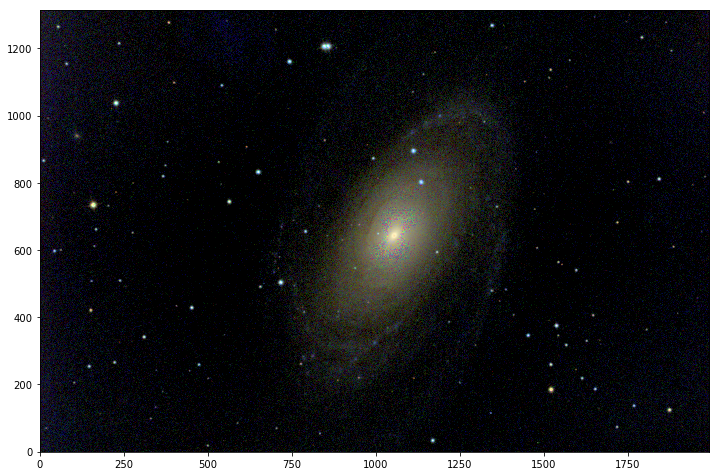

In [246]:
ax = plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(r,v,.8*b,filename="m81.jpeg", Q=7,stretch=15)
plt.imshow(image,origin='lower')


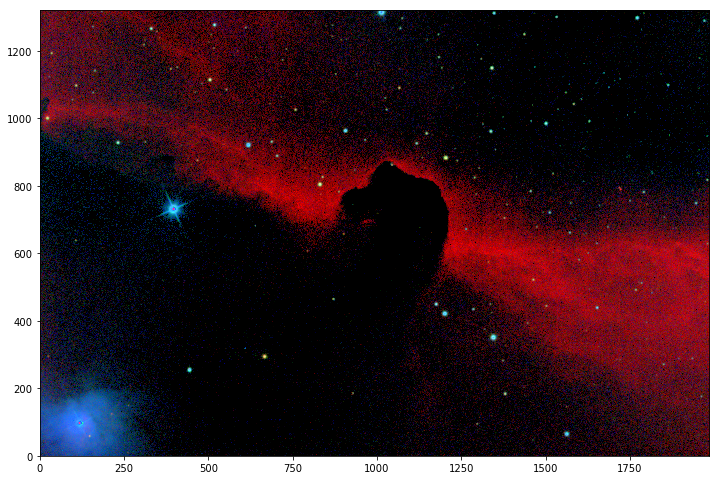

In [367]:
b,ab,bb = readimage('horsehead-b.fits')
v,av,bv = readimage('horsehead-v.fits')
r,ar,br = readimage('horsehead-ha.fits')
ax = plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(r,.7*v,1.2*b,filename="horsehead.jpeg", Q=7,stretch=10)
plt.imshow(image,origin='lower')


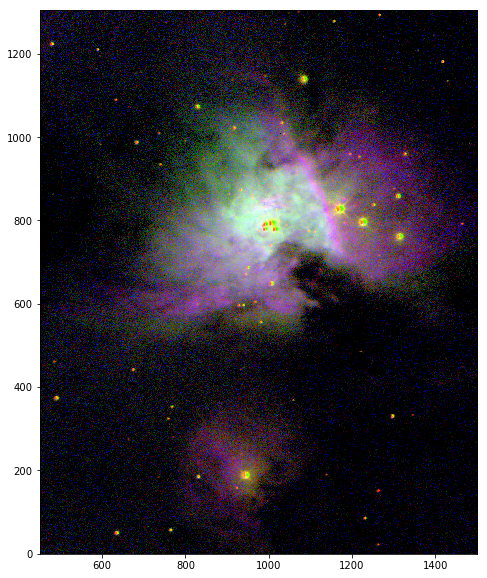

In [355]:
b,ab,bb = readimage('orion-ha.fits')
v,av,bv = readimage('orion-v.fits')
r,ar,br = readimage('orion-r.fits')
ax = plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(.5*r,.5*v,0.3*b,filename="orion-havr.png", Q=5,stretch=2.5)
plt.imshow(image,origin='lower')
#plt.axis([300,1500,500,1200])
plt.xlim(450,1500)
plt.savefig('orion-havr-cropped.png')

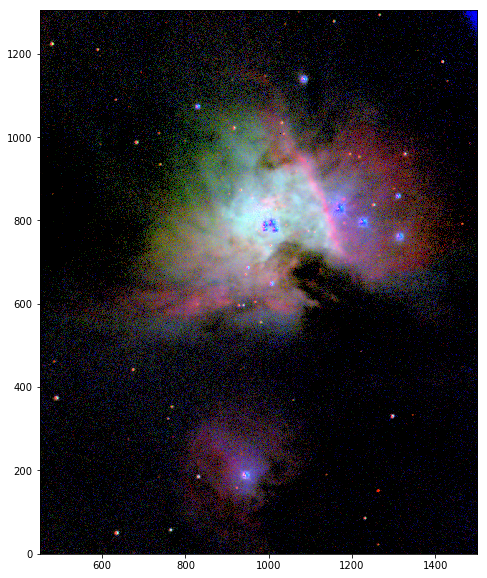

In [356]:
b,ab,bb = readimage('orion-b.fits')
v,av,bv = readimage('orion-v.fits')
r,ar,br = readimage('orion-r.fits')
ax = plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(.5*r,.5*v,70*b,filename="orion-bvr.png", Q=5,stretch=2.5)
plt.imshow(image,origin='lower')
#plt.axis([300,1500,500,1200])
plt.xlim(450,1500)
plt.savefig('orion-bvr-cropped.png')

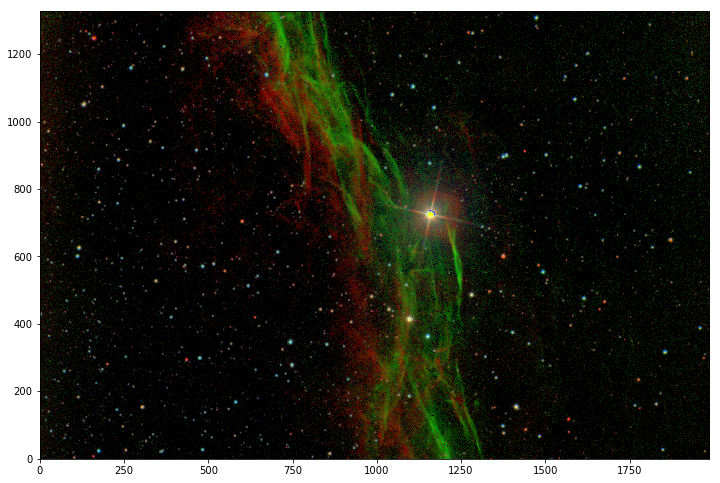

In [359]:
b,ab,bb = readimage('veil-b.fits')
v,av,bv = readimage('veil-o3.fits')
r,ar,br = readimage('veil-ha.fits')
ax = plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(r,v,.4*b,filename="veil.png", Q=10,stretch=7)
plt.imshow(image,origin='lower')
#plt.axis([500,1500,500,1200])

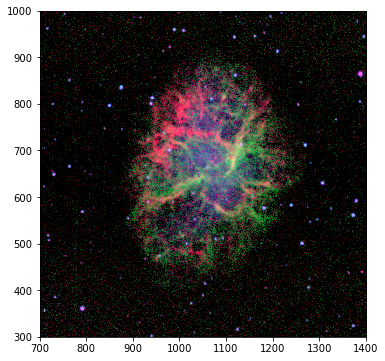

In [365]:
b,ab,bb = readimage('crab-b.fits')
v,av,bv = readimage('crab-o3.fits')
r,ar,br = readimage('crab-ha.fits')
ax = plt.figure(figsize=(8,6))
image = lupton_rgb.make_lupton_rgb(r,.6*v,1.2*b,filename="crab.jpeg", Q=5,stretch=20)
plt.imshow(image,origin='lower')
plt.axis([700,1400,300,1000])
plt.savefig('crab-cropped.png')

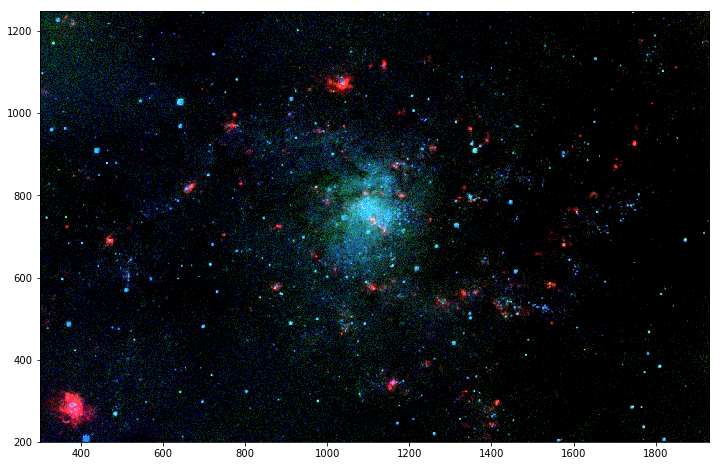

In [468]:
obj = 'm33'
b,ab,bb = readimage(obj+'-v.fits')
v,av,bv = readimage(obj+'-r.fits')
r,ar,br = readimage(obj+'-ha.fits')
ax = plt.figure(figsize=(12,10))
#image = lupton_rgb.make_lupton_rgb(v,1.5*b,.5*r,filename=obj+".jpeg", Q=10,stretch=15)
image = lupton_rgb.make_lupton_rgb(.4*r,v,b,filename=obj+".jpeg", Q=1,stretch=25)
plt.imshow(image,origin='lower')
#plt.axis([250,1400,300,1000])
x1,x2 = plt.xlim()
plt.xlim(300,x2-50)
y1,y2 = plt.ylim()
plt.ylim(200,1250)
plt.savefig(obj+'-cropped.png')

In [473]:
!pip install image_scale

//anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,
  Could not find a version that satisfies the requirement image_scale (from versions: )
No matching distribution found for image_scale
You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [475]:
import img_scale as imgs

In [496]:
b,ab,bb = readimage('orion-b.fits')
v,av,bv = readimage('orion-v.fits')
r,ar,br = readimage('orion-r.fits')

In [559]:
img = np.zeros((b.shape[0],v.shape[1],3),dtype=float)
sb = imgs.asinh(b,scale_min=ab,scale_max=scoreatpercentile(b,84.2))
sv = imgs.asinh(v,scale_min=av,scale_max=scoreatpercentile(v,99.9))
sr = imgs.asinh(r,scale_min=ar,scale_max=scoreatpercentile(r,99.2))
img[:,:,0] = sr
img[:,:,1] = sv
img[:,:,2] = sb

img_scale : asinh
img_scale : asinh
img_scale : asinh


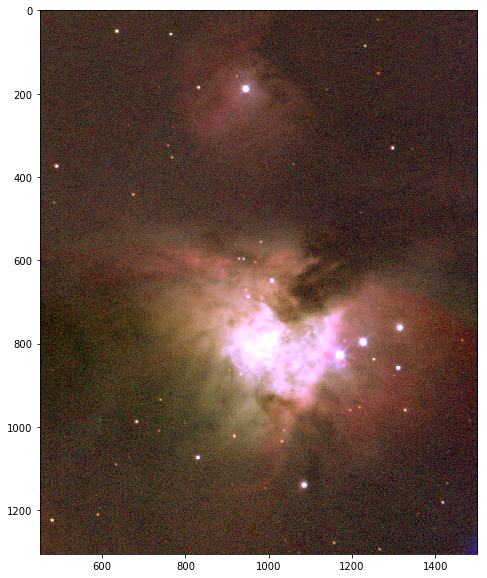

In [560]:
plt.figure(figsize=(8,10))
plt.imshow(img,aspect='equal')
plt.xlim(450,1500)
plt.savefig('orion-asinh.png')

(450, 1500)

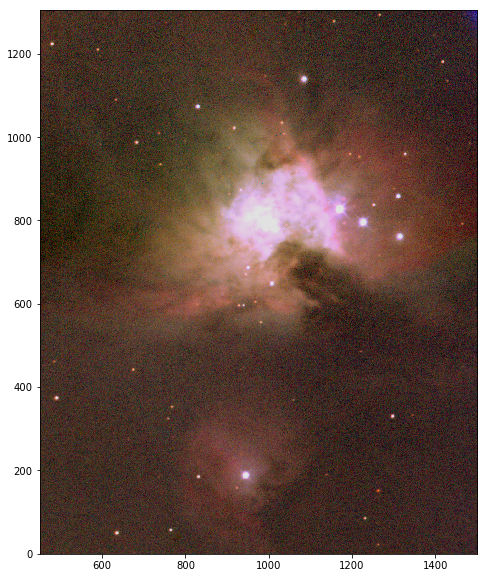

In [567]:
plt.figure(figsize=(12,10))
image = lupton_rgb.make_lupton_rgb(sr,sv,sb,filename="orion-lupton-asinh.png", Q=1,stretch=1)
plt.imshow(image,origin='lower')
plt.xlim(450,1500)